In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
import plotly.express as px
matplotlib.rcParams["figure.figsize"]=(20,10)
df1=pd.read_csv('/content/drive/MyDrive/Bengaluru_House_Data.csv')
df1.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [14]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True  


In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(5)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [16]:
def convert_sqft_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None    

In [17]:
convert_sqft_num

<function __main__.convert_sqft_num(x)>

In [18]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_num)

df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [36]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [37]:
len(df5.location.unique())

1304

In [38]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [39]:
location_less_than_10=location_stats[location_stats<=5]
len(location_less_than_10)


908

In [40]:
len(df5.location.unique())

1293

In [46]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_less_than_10 else x )
len(df5.location.unique())


386

score increased from 84% to 90% after classifing locations which occur less than 5 times as "others".  In the video locations which occur less than 10 times are classified as "others"

In [47]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [48]:
df5.shape

(13246, 7)

In [49]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [ ]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [50]:
def removeppsoutlier(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    n=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(n-st))&(subdf.price_per_sqft<=(n+st))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out  

In [51]:
df7=removeppsoutlier(df6)
df7.shape

(10037, 7)

In [64]:
def plot_scatter(df,location):
  bhk2=df[(df.location==location)&(df.bhk==2)]
  bhk3=df[(df.location==location)&(df.bhk==3)]
  matplotlib.rcParams['figure.figsize']=(15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 bhk',s=50)
  plt.xlabel('total sqft area')
  plt.ylabel('price')
  plt.title(location)
  plt.legend()

 

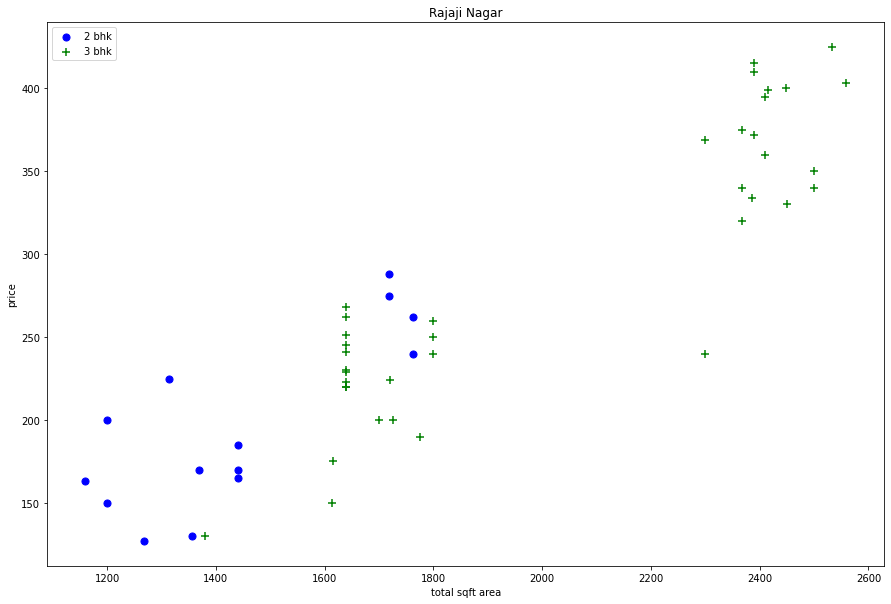

In [65]:
 plot_scatter(df7,'Rajaji Nagar')

In [67]:
def remove_bhk_outliers(df):
  exclude_indices=np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
       stats=bhk_stats.get(bhk-1)
       if stats and stats['count']>5:
         exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')       

df8=remove_bhk_outliers(df7)
df8.shape




(7611, 7)

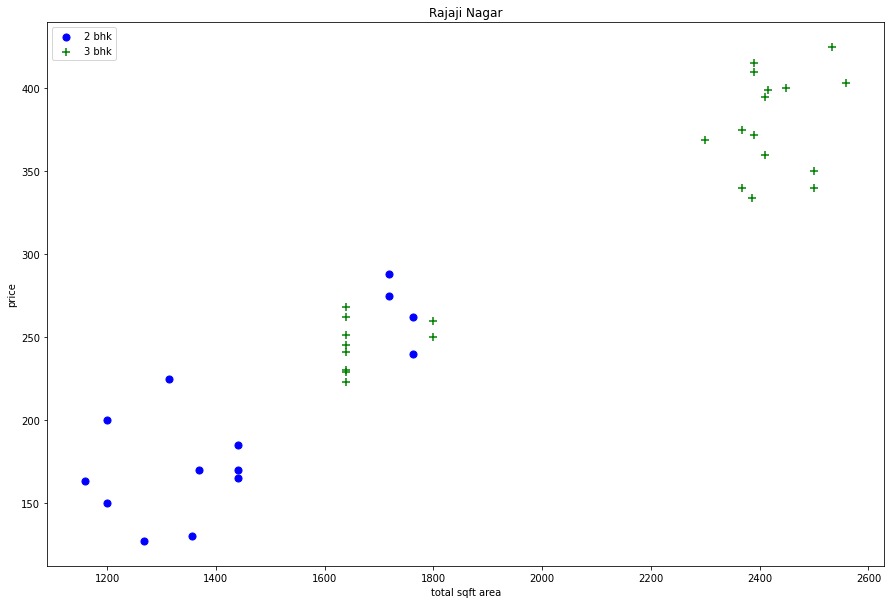

In [68]:
plot_scatter(df8,'Rajaji Nagar')

Text(0, 0.5, 'count')

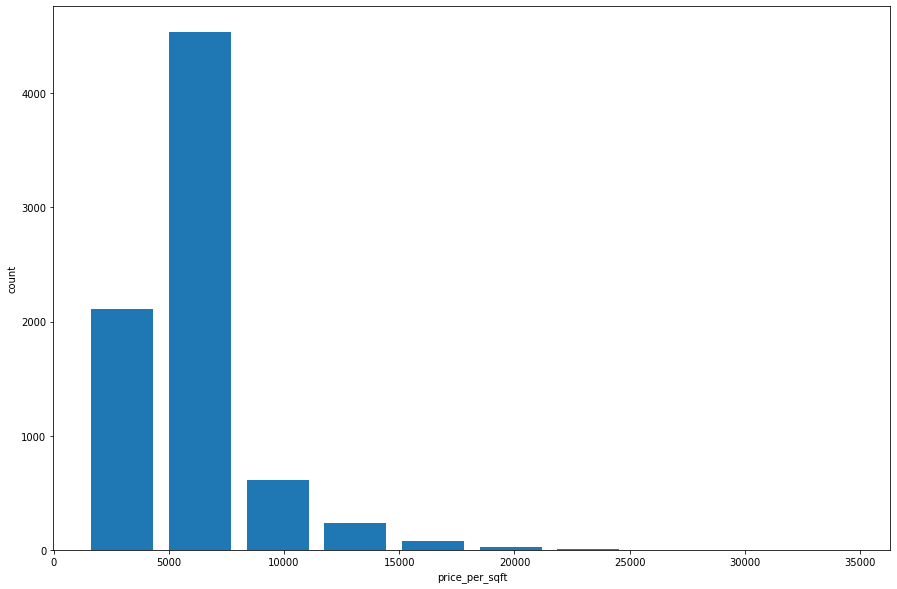

In [69]:
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("price_per_sqft")
plt.ylabel("count")

In [70]:
df8.bath.unique()

array([ 3.,  2.,  4.,  5.,  1.,  8.,  9.,  6., 14.,  7., 12., 16., 13.])

In [71]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
668,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5754,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8932,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8992,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9452,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9666,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

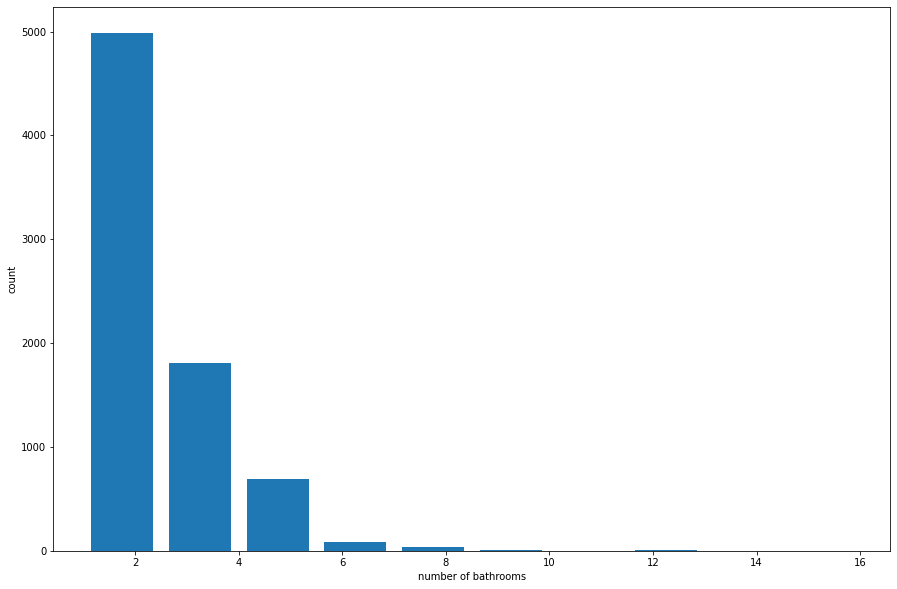

In [72]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel("count")

In [73]:
df8[df8.bath>df8.bhk+3]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
668,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5702,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429


In [76]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7532, 7)

In [77]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block HRBR Layout,2300.0,3.0,80.0,3
1,1st Block HRBR Layout,1250.0,2.0,67.0,2
2,1st Block Jayanagar,2850.0,4.0,428.0,4
3,1st Block Jayanagar,1630.0,3.0,194.0,3
4,1st Block Jayanagar,1875.0,2.0,235.0,3


In [78]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Block Hrbr Layout,2nd Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,3rd Block Hrbr Layout,4th Block Koramangala,...,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Block Hrbr Layout,...,Vittasandra,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,1st Block HRBR Layout,2300.0,3.0,80.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block HRBR Layout,1250.0,2.0,67.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2850.0,4.0,428.0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1630.0,3.0,194.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1875.0,2.0,235.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df12=df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Block Hrbr Layout,2nd Phase JP Nagar,...,Vittasandra,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,2300.0,3.0,80.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,67.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2850.0,4.0,428.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1630.0,3.0,194.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1875.0,2.0,235.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
x=df12.drop('price',axis='columns')
x.head()

,total_sqft,bath,bhk,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Block Hrbr Layout,2nd Phase JP Nagar,2nd Phase Judicial Layout,...,Vittasandra,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,2300.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2850.0,4.0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1630.0,3.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1875.0,2.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
y=df12.price
y.head()

0     80.0
1     67.0
2    428.0
3    194.0
4    235.0
Name: price, dtype: float64

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)


In [90]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.9071878811437158

score increased from 84% to 90% after classifing locations which occur less than 5 times as "others".  In the video locations which occur less than 10 times are classified as "others"

In [91]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([ 8.30397221e-01,  8.68694484e-01,  8.55460407e-01,  6.44976116e-01,
       -3.83808677e+15])

In [ ]:
not able to understand these scores 

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_model_using_gscv(x,y):
  algos={
      'linear_regression':{
      'model':LinearRegression(),
      'params':{
          'normalize':[True,False]
      }
      },
       'lasso':{
      'model':Lasso(),
      'params':{
          'alpha':[1,2],
          'selection':['random','cyclic']
      }
      },
        'decision_tree':{
      'model':DecisionTreeRegressor(),
      'params':{
          'criterion':['mse','friedman_mse'],
          'splitter':['best','random']
      }
      }
  }

  scores=[]
  cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
  for algo_name,config in algos.items():
    gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
    gs.fit(x,y)
    scores.append({
        'model':algo_name,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
    })
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])  
find_model_using_gscv(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,-7.676174e+14,{'normalize': False}
1,lasso,6.700701e-01,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,6.753260e-01,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [87]:
def predict_price(location,sqft,bath,bhk):
  loc_index=np.where(x.columns==location)[0][0]
  a=np.zeros(len(x.columns))
  a[0]=sqft
  a[1]=bath
  a[2]=bhk
  if loc_index >=0:
    a[loc_index]=1
  return lr_clf.predict([a])[0]  


In [88]:
predict_price('1st Phase JP Nagar',1000,2,2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


86.59942273072787